In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import sklearn

In [2]:
ger = pd.read_csv('german_credit_data.csv')
ger.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


In [3]:
# Drop the Saving accounts and Checking account columns - we don't care about em
ger = ger.drop(columns=['Saving accounts', 'Checking account', 'Unnamed: 0'])
# Drop anything without value and the result is in place of ger
ger.dropna(inplace=True)
ger.head()

,Age,Sex,Job,Housing,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,1169,6,radio/TV,good
1,22,female,2,own,5951,48,radio/TV,bad
2,49,male,1,own,2096,12,education,good
3,45,male,2,free,7882,42,furniture/equipment,good
4,53,male,2,free,4870,24,car,bad


In [4]:
# Initialize empty df then concatcolumn values as new columns
encodedDF = pd.DataFrame()
encodedDF = pd.concat([encodedDF, pd.get_dummies(ger['Sex'], prefix = 'Gender'),
                      pd.get_dummies(ger['Job'], prefix = 'Job'),
                      pd.get_dummies(ger['Housing'], prefix = 'Housing'),
                      pd.get_dummies(ger['Purpose'], prefix = 'Purpose')],axis=1)
encodedDF.head()

,Gender_female,Gender_male,Job_0,Job_1,Job_2,Job_3,Housing_free,Housing_own,Housing_rent,Purpose_business,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others
0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0
1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0
2,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0
3,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0
4,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0


In [5]:
# Encode the risk to make a risk label
from sklearn.preprocessing import LabelEncoder
# Initialize label encoder
le = LabelEncoder()
# Needs to be fitted
le.fit(ger['Risk'])
# Encode the Risk from the OG df, save in encoded df
encodedDF['Risk_Label'] = le.transform(ger['Risk']) 

In [6]:
# Grabs every row from every column except the last one (our label)
features = encodedDF.iloc[:, :-1]
labels = encodedDF['Risk_Label']

In [7]:
from sklearn.model_selection import train_test_split
# Run train test split of the dataframes, using 30% test
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size = .30)

In [8]:
#TODO figure out why this didnt not work
#test = pd.DataFrame(encodedDF.corr()['Risk_Label']).abs().nlargest(5, 'Risk_Label')
#test = pd.DataFrame(encodedDF.corr()['Risk_Label']).abs().nlargest(5, 'Risk_Label')

#type(list(test))
#test.index
#test
#tst.drop(columns='Housing_rent')
#test2 = encodedDF[list(test.index)].drop(columns='Risk_Label')
#encodedDF
#test

In [9]:
#knnClassifier.fit(test, labels)
#knnClassifier.predict(y_train)


In [10]:
from sklearn.neighbors import KNeighborsClassifier
knnClassifier = KNeighborsClassifier(n_neighbors=5)
#knnClassifier.fit(X_train, y_train)
# Make the KNN Prediction and undo the encoding
#knnPred = le.inverse_transform(knnClassifier.predict(X_test))

In [11]:
from sklearn.tree import DecisionTreeClassifier
decTree = DecisionTreeClassifier()

from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

In [12]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sn
from sklearn.model_selection import cross_val_score


In [13]:
# Function to make the prediction and show the relevant statistics
def prediction(model):
    # Fit the model
    model.fit(X_train, y_train)
    # Predict the test values
    pred = model.predict(X_test)
    # Undo the scale and transform
    pred = le.inverse_transform(pred)
    # Generate the Classification report
    classReport = classification_report(le.inverse_transform(y_test), pred)
    #classReport = classification_report(y_test, pred)
    print('Classification Report')
    print(classReport)
    # X validation score
    xValScore = cross_val_score(model, X_train, y_train, cv=3, scoring="accuracy")
    print('Cross Validation Score')
    print(xValScore)
    # Make the confusion matrix
    cfMatrix = confusion_matrix(le.inverse_transform(y_test), pred, labels = ['good', 'bad'])
    print("Confusion Matrix")
    print(cfMatrix)
    # Graph the confusion matrix using seaborn
    sn.heatmap(cfMatrix, annot=True)


KNN
Classification Report
              precision    recall  f1-score   support

         bad       0.35      0.14      0.20        91
        good       0.70      0.89      0.78       209

    accuracy                           0.66       300
   macro avg       0.53      0.51      0.49       300
weighted avg       0.60      0.66      0.61       300

Cross Validation Score
[0.5982906  0.6025641  0.64224138]
Confusion Matrix
[[185  24]
 [ 78  13]]


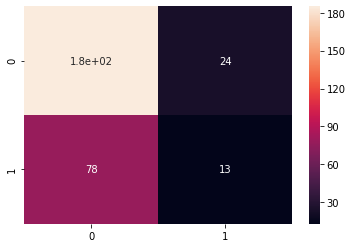

In [14]:
print("KNN")
prediction(knnClassifier)

Decision Tree
Classification Report
              precision    recall  f1-score   support

         bad       0.29      0.12      0.17        91
        good       0.69      0.87      0.77       209

    accuracy                           0.64       300
   macro avg       0.49      0.50      0.47       300
weighted avg       0.57      0.64      0.59       300

Cross Validation Score
[0.6025641  0.62820513 0.64655172]
Confusion Matrix
[[182  27]
 [ 80  11]]


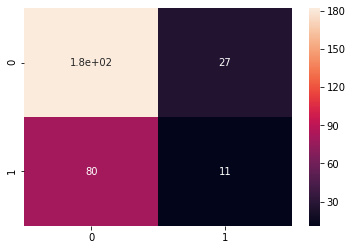

In [15]:
print("Decision Tree")
prediction(decTree)

GNB
Classification Report
              precision    recall  f1-score   support

         bad       0.45      0.24      0.31        91
        good       0.73      0.87      0.79       209

    accuracy                           0.68       300
   macro avg       0.59      0.56      0.55       300
weighted avg       0.64      0.68      0.65       300

Cross Validation Score
[0.60683761 0.67094017 0.29310345]
Confusion Matrix
[[182  27]
 [ 69  22]]


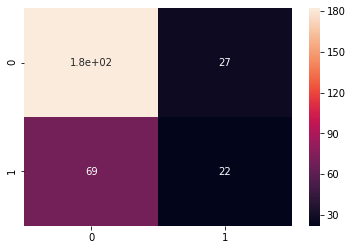

In [16]:
print("GNB")
prediction(gnb)

In [17]:
# TODO pick the 5 largest absolute correlation val, make new prediction off of that
# Make the predictions again
# Could do this before making the predictions


In [18]:
#print(X_train)
# TODO figure out why this is less accurate
from sklearn.preprocessing import StandardScaler
# Initialize Standard Scaler
scaler = StandardScaler()
# Fit the training data
scaler.fit(X_train)
# Scale the training and testing data
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)



Classification Report
              precision    recall  f1-score   support

         bad       0.38      0.22      0.28        91
        good       0.71      0.84      0.77       209

    accuracy                           0.65       300
   macro avg       0.54      0.53      0.52       300
weighted avg       0.61      0.65      0.62       300

Cross Validation Score
[0.57692308 0.59401709 0.64655172]
Confusion Matrix
[[176  33]
 [ 71  20]]


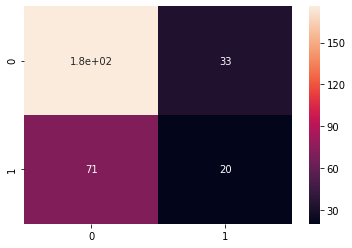

In [19]:
# TODO why is the scaled data less accurate?
#print(X_train)
knnClassifier2 = KNeighborsClassifier(n_neighbors=7)
prediction(knnClassifier2)

Classification Report
              precision    recall  f1-score   support

         bad       0.50      0.07      0.12        91
        good       0.70      0.97      0.82       209

    accuracy                           0.70       300
   macro avg       0.60      0.52      0.47       300
weighted avg       0.64      0.70      0.60       300

Cross Validation Score
[0.70940171 0.67948718 0.70258621]
Confusion Matrix
[[203   6]
 [ 85   6]]


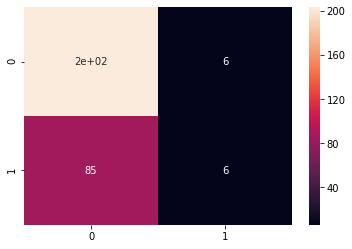

In [20]:
# Trying to improve decision tree classifier
decTree2 = DecisionTreeClassifier(max_depth=3)
prediction(decTree2)

Classification Report
              precision    recall  f1-score   support

         bad       0.31      0.12      0.17        91
        good       0.70      0.88      0.78       209

    accuracy                           0.65       300
   macro avg       0.50      0.50      0.48       300
weighted avg       0.58      0.65      0.59       300

Cross Validation Score
[0.5982906  0.62820513 0.65086207]
Confusion Matrix
[[184  25]
 [ 80  11]]


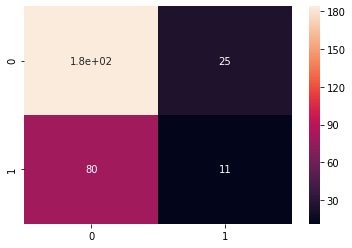

In [21]:
# Playing with the decision Tree classifier 
decTree3 = DecisionTreeClassifier(splitter="random")
prediction(decTree3)

GNB
Classification Report
              precision    recall  f1-score   support

         bad       0.45      0.24      0.31        91
        good       0.73      0.87      0.79       209

    accuracy                           0.68       300
   macro avg       0.59      0.56      0.55       300
weighted avg       0.64      0.68      0.65       300

Cross Validation Score
[0.60683761 0.67094017 0.29310345]
Confusion Matrix
[[182  27]
 [ 69  22]]


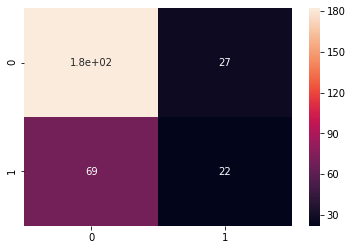

In [22]:
print("GNB")
prediction(gnb)